## Exploring the Results from Cloud Vision

#### Import statements

In [ ]:
import matplotlib
import matplotlib.pylab as plt
import pandas as pd
import json
import os
import statistics

In [ ]:

dataset_dir = os.path.expanduser("~") + "/datasets/handwriting/IAM_Handwriting_Top50/"
images_dir = dataset_dir + "data_subset/"
analysis_dir = dataset_dir + "gcloud_analysis/"

fullTextAnnotationDict = {}

for filename in os.listdir(analysis_dir):
    f = os.path.join(analysis_dir, filename)
    
    with open(f, encoding='utf-8', errors='ignore') as file: 
        try :
            js = json.load(file)
            
            fullTextAnnotationDict[filename] = js['responses'][0]['fullTextAnnotation']
        except:
            print("Error processing: ", filename)

In [4]:
len(fullTextAnnotationDict)

4866

In [ ]:
confidence = [x['pages'][0]['confidence'] for x in fullTextAnnotationDict.values()]
cpd = pd.DataFrame(confidence)
# print(len(confidence))
plt.figure(figsize=(15, 5))
plt.hist(cpd.values, bins=40)
plt.show()

#### Get the confidence Levels Per Author

In [31]:
img_author = {}
authors = {}
author_errors = {}
from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))
# forms = pd.read_csv('../input/iam-handwriting-top50/forms_for_parsing.txt', header=None)
# print(forms.head)
with open(dataset_dir + '/forms_for_parsing.txt') as f:
    for line in f:
        key = line.split(' ')[0]
        writer = line.split(' ')[1]
        img_author[key] = writer
        if writer not in authors:
            authors[writer] = []
            author_errors[writer] = []
        authors[writer].append(key)
print("# Authors: ", len(authors.keys()))
print("# Images: ", len(img_author.keys()))

# Authors:  657
# Images:  1539


#### Show the error rates per author

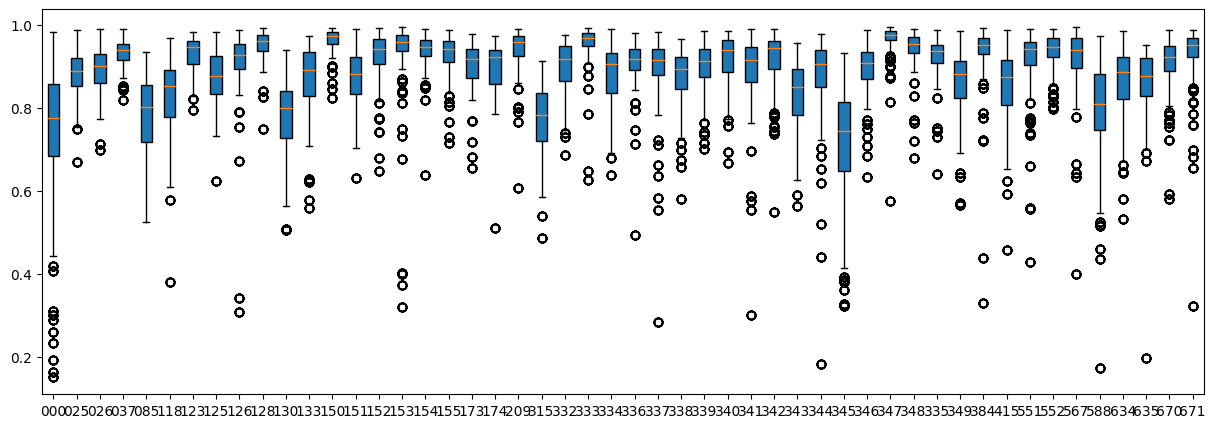

In [53]:
for filename, json_resp in fullTextAnnotationDict.items():
    fn_key = '-'.join(filename.split("-")[0:2])
    author = img_author[fn_key]
    confidence = json_resp['pages'][0]['confidence']
    author_errors[str(author)].append(confidence)
# {k:v for (k,v) in d.items() if filter_string in k}
author_errors_filtered = { k:v for (k,v) in author_errors.items() if len(v) > 0 }
# print("# Authors: ", len(author_errors_filtered.keys())) 

author_normalized_errors = {k: statistics.mean(v) for k, v in author_errors_filtered.items()}
# print(author_normalized_errors)
plt.figure(figsize=(15, 5))
plt.boxplot(author_errors_filtered.values(), vert=True, patch_artist=True)
plt.xticks(range(1, len(author_errors_filtered.keys()) + 1), author_errors_filtered.keys())
plt.show()